### This file plots the processed csv files with matplotlib

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [3]:
date = '2018-11-21_18h43'
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/' + date + '/'

In [4]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

## Queue length plot for multigets

In [5]:
# read data into pandas dataframe
df_ql = pd.read_csv(base_path + 'queuelength.csv')
df_ql

,client,worker,ratio,sharded,queueLength,queueLength_std
0,12,64,1:1,True,1.238146,0.010086
1,12,64,1:1,False,1.238146,0.010086
2,12,64,1:3,True,1.227245,0.009897
3,12,64,1:3,False,1.215221,0.010545
4,12,64,1:6,True,1.220984,0.007873
5,12,64,1:6,False,1.210208,0.003691
6,12,64,1:9,True,1.212327,0.010986
7,12,64,1:9,False,1.204416,0.011221


### sharded

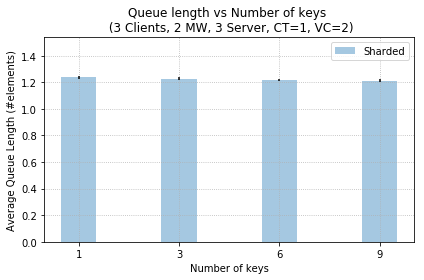

In [6]:
n_groups = 4
df_ql_s = df_ql[df_ql['sharded']==True]

means_ql = df_ql_s['queueLength']
std_ql = df_ql_s['queueLength_std']

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4

ax.bar(index, means_ql, bar_width,
                alpha=opacity,
                yerr=std_ql,
                label='Sharded')


ax.set_xlabel('Number of keys')
ax.set_ylabel('Average Queue Length (#elements)')
ax.set_title('Queue length vs Number of keys \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)')
ax.set_xticks(index)
ax.set_xticklabels(('1', '3', '6', '9'))
ax.legend()

plt.ylim(bottom=0, top=np.max(means_ql)+0.3)
plt.grid(linestyle = "dotted")

fig.tight_layout()
plt.show()
fig.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/queueLength_sharded.png", dpi = 150)


### non sharded

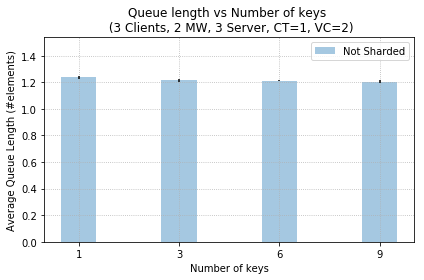

In [7]:
n_groups = 4
df_ql_n = df_ql[df_ql['sharded']==False]

means_ql = df_ql_n['queueLength']
std_ql = df_ql_n['queueLength_std']

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4

ax.bar(index, means_ql, bar_width,
                alpha=opacity,
                yerr=std_ql,
                label='Not Sharded')


ax.set_xlabel('Number of keys')
ax.set_ylabel('Average Queue Length (#elements)')
ax.set_title('Queue length vs Number of keys \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)')
ax.set_xticks(index)
ax.set_xticklabels(('1', '3', '6', '9'))
ax.legend()

plt.ylim(bottom=0, top=np.max(means_ql)+0.3)
plt.grid(linestyle = "dotted")

fig.tight_layout()
plt.show()
fig.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/queueLength_notsharded.png", dpi = 150)


## Response-time breakdown histogram for multigets

In [8]:
# read data into pandas dataframe
df_b = pd.read_csv(base_path + 'rt_breakdown.csv')
df_b

,client,worker,ratio,sharded,netthreadTime,queueTime,workerPreTime,memcachedRTT,workerPostTime
0,12,64,1:1,True,0.024226,0.093028,0.029493,0.807451,0.021410
1,12,64,1:1,False,0.021669,0.088495,0.016684,0.766720,0.019423
2,12,64,1:3,True,0.022021,0.090632,0.026481,0.780764,0.020913
3,12,64,1:3,False,0.021669,0.088495,0.016684,0.766720,0.019423
4,12,64,1:6,True,0.023300,0.089930,0.026988,0.783003,0.020436
5,12,64,1:6,False,0.022533,0.087429,0.017268,0.775962,0.019368
6,12,64,1:9,True,0.023143,0.086389,0.026808,0.788689,0.020260
7,12,64,1:9,False,0.022556,0.085217,0.017435,0.771561,0.019322


### not sharded

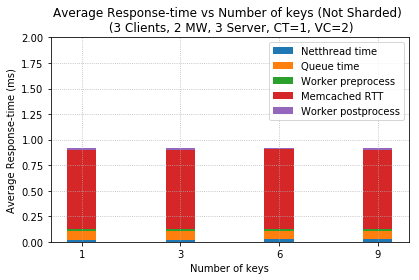

In [9]:
n_groups = 4
index = np.arange(n_groups)
df_ql_n = df_b[df_b['sharded']==False]

fig, ax = plt.subplots()

vcs = df_ql_n['ratio']
net_time = df_ql_n['netthreadTime']
queue_time = df_ql_n['queueTime']
workerPreTime = df_ql_n['workerPreTime']
memcachedRTT = df_ql_n['memcachedRTT']
workerPostTime = df_ql_n['workerPostTime']

width = 0.3       # the width of the bars: can also be len(x) sequence
ax.bar(vcs, net_time, width, label='Netthread time')
ax.bar(vcs, queue_time, width, bottom=net_time, label='Queue time')
ax.bar(vcs, workerPreTime, width, bottom=net_time+queue_time, label='Worker preprocess')
ax.bar(vcs, memcachedRTT, width, bottom=net_time+queue_time+workerPreTime, label='Memcached RTT')
ax.bar(vcs, workerPostTime, width, bottom=net_time+queue_time+workerPreTime+memcachedRTT, label='Worker postprocess')

ax.grid(linestyle = "dotted")
ax.set_xlabel('Number of keys')
ax.set_ylabel('Average Response-time (ms)')
ax.set_title('Average Response-time vs Number of keys (Not Sharded) \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)')
ax.set_xticks(index)
ax.set_xticklabels(('1', '3', '6', '9'))
ax.set_ylim(bottom=0)
ax.legend()

plt.ylim(bottom=0, top=2)
plt.grid(linestyle = "dotted")

fig.tight_layout()
plt.show()
fig.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/rt_breakdown_notsharded.png", dpi = 150)


### sharded

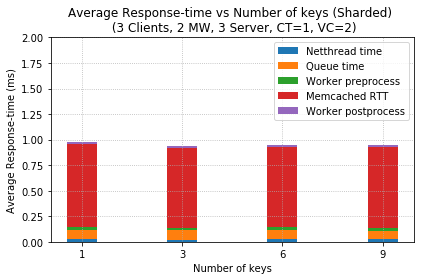

In [10]:
n_groups = 4
index = np.arange(n_groups)
df_ql_s = df_b[df_b['sharded']==True]

fig, ax = plt.subplots()

vcs = df_ql_s['ratio']
net_time = df_ql_s['netthreadTime']
queue_time = df_ql_s['queueTime']
workerPreTime = df_ql_s['workerPreTime']
memcachedRTT = df_ql_s['memcachedRTT']
workerPostTime = df_ql_s['workerPostTime']

width = 0.3       # the width of the bars: can also be len(x) sequence
ax.bar(vcs, net_time, width, label='Netthread time')
ax.bar(vcs, queue_time, width, bottom=net_time, label='Queue time')
ax.bar(vcs, workerPreTime, width, bottom=net_time+queue_time, label='Worker preprocess')
ax.bar(vcs, memcachedRTT, width, bottom=net_time+queue_time+workerPreTime, label='Memcached RTT')
ax.bar(vcs, workerPostTime, width, bottom=net_time+queue_time+workerPreTime+memcachedRTT, label='Worker postprocess')

ax.grid(linestyle = "dotted")
ax.set_xlabel('Number of keys')
ax.set_ylabel('Average Response-time (ms)')
ax.set_title('Average Response-time vs Number of keys (Sharded) \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)')
ax.set_xticks(index)
ax.set_xticklabels(('1', '3', '6', '9'))
ax.set_ylim(bottom=0)
ax.legend()

plt.ylim(bottom=0, top=2)
plt.grid(linestyle = "dotted")

fig.tight_layout()
plt.show()
fig.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/rt_breakdown_sharded.png", dpi = 150)


## Response time histograms (mw)

In [11]:
# read data into pandas dataframe
df_hist = pd.read_csv(base_path + 'mw_histogram.csv')
df_hist

,mw,sharded,ratio,rep,latency,weight
0,1,True,1:6,1,1,0
1,1,True,1:6,1,2,0
2,1,True,1:6,1,3,0
3,1,True,1:6,1,4,85
4,1,True,1:6,1,5,5801
5,1,True,1:6,1,6,34173
6,1,True,1:6,1,7,53462
7,1,True,1:6,1,8,45018
8,1,True,1:6,1,9,29931
9,1,True,1:6,1,10,18645


## Histogram sharded get requests

In [34]:
df_s = df_hist[(df_hist['sharded']==True) & (df_hist['mw']==2)] 

In [12]:
df_s = df_hist[(df_hist['sharded']==True)] 

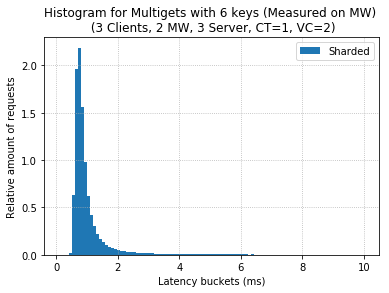

In [13]:
f = plt.figure()
plt.title("Histogram for Multigets with 6 keys (Measured on MW) \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)")
plt.ylabel("Relative amount of requests")
plt.xlabel("Latency buckets (ms)")

plt.hist(x=df_s['latency']/10,bins=100,weights=df_s['weight'], density=True, label='Sharded',rwidth=1)
plt.grid(linestyle = "dotted")
plt.legend(loc='best')
plt.show() 
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/mw_histogram_sharded.png", dpi = 150)


## Histogram non-sharded get requests

In [40]:
df_n = df_hist[(df_hist['sharded']==False) & (df_hist['mw']==2)] 

In [14]:
df_n = df_hist[(df_hist['sharded']==False)] 

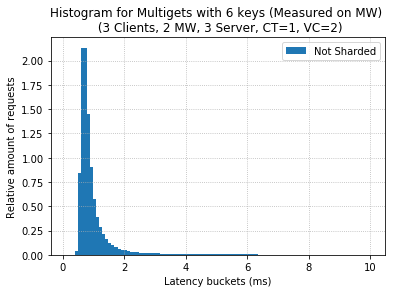

In [15]:
f = plt.figure()
plt.title("Histogram for Multigets with 6 keys (Measured on MW) \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)")
plt.ylabel("Relative amount of requests")
plt.xlabel("Latency buckets (ms)")

plt.hist(x=df_n['latency']/10,bins=100,weights=df_n['weight'], density=True, label='Not Sharded', rwidth=1)
plt.grid(linestyle = "dotted")
plt.legend(loc='best')
plt.show() 
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/mw_histogram_nonsharded.png", dpi = 150)
